## LightGBM で二値分類
- https://qiita.com/d_desuyon/items/807e01311ad08570ee78

In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb

In [52]:
dataset = datasets.load_breast_cancer()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, train_size=0.7, test_size=0.3, shuffle=True, random_state=142, stratify=dataset.target, )

In [54]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

In [55]:
params = {"num_leaves": 31, 
            "max_depth": 5, 
            "objective": "binary", 
            "metric": "binary_logloss"}

In [39]:
bst = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=lgb_test, early_stopping_rounds=500, verbose_eval=10)

Training until validation scores don't improve for 500 rounds
[10]	valid_0's binary_logloss: 0.315
[20]	valid_0's binary_logloss: 0.225575
[30]	valid_0's binary_logloss: 0.199127
[40]	valid_0's binary_logloss: 0.196457
[50]	valid_0's binary_logloss: 0.212
[60]	valid_0's binary_logloss: 0.232063
[70]	valid_0's binary_logloss: 0.251663
[80]	valid_0's binary_logloss: 0.269436
[90]	valid_0's binary_logloss: 0.29249
[100]	valid_0's binary_logloss: 0.316262
[110]	valid_0's binary_logloss: 0.338586
[120]	valid_0's binary_logloss: 0.364935
[130]	valid_0's binary_logloss: 0.385493
[140]	valid_0's binary_logloss: 0.407232
[150]	valid_0's binary_logloss: 0.433131
[160]	valid_0's binary_logloss: 0.451511
[170]	valid_0's binary_logloss: 0.463219
[180]	valid_0's binary_logloss: 0.472909
[190]	valid_0's binary_logloss: 0.475331
[200]	valid_0's binary_logloss: 0.479874
[210]	valid_0's binary_logloss: 0.482472
[220]	valid_0's binary_logloss: 0.486549
[230]	valid_0's binary_logloss: 0.489806
[240]	valid

In [40]:
y_pred = bst.predict(X_test)

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_test, y_pred)

0.7683393942381509

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

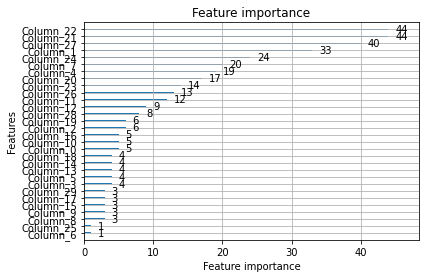

In [43]:
lgb.plot_importance(bst)

In [45]:
bst.feature_importance()

array([ 5, 33,  6,  4, 19,  4,  1, 20,  3,  3,  5, 12,  9,  4,  4,  3,  5,
        3,  4,  6, 17, 44, 44, 14, 24,  1, 13, 40,  8,  3], dtype=int32)

In [56]:
params["metric"] = "auc"

In [57]:
bst = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=lgb_test, early_stopping_rounds=500, verbose_eval=10)

Training until validation scores don't improve for 500 rounds
[10]	valid_0's auc: 0.965756
[20]	valid_0's auc: 0.972255
[30]	valid_0's auc: 0.974737
[40]	valid_0's auc: 0.973861
[50]	valid_0's auc: 0.972693
[60]	valid_0's auc: 0.969626
[70]	valid_0's auc: 0.96802
[80]	valid_0's auc: 0.96948
[90]	valid_0's auc: 0.967728
[100]	valid_0's auc: 0.967436
[110]	valid_0's auc: 0.966852
[120]	valid_0's auc: 0.965099
[130]	valid_0's auc: 0.967436
[140]	valid_0's auc: 0.967144
[150]	valid_0's auc: 0.968312
[160]	valid_0's auc: 0.967582
[170]	valid_0's auc: 0.968458
[180]	valid_0's auc: 0.968604
[190]	valid_0's auc: 0.968896
[200]	valid_0's auc: 0.968604
[210]	valid_0's auc: 0.968312
[220]	valid_0's auc: 0.96802
[230]	valid_0's auc: 0.968166
[240]	valid_0's auc: 0.96802
[250]	valid_0's auc: 0.968166
[260]	valid_0's auc: 0.968312
[270]	valid_0's auc: 0.968604
[280]	valid_0's auc: 0.968458
[290]	valid_0's auc: 0.968312
[300]	valid_0's auc: 0.968312
[310]	valid_0's auc: 0.968312
[320]	valid_0's auc: 

In [58]:
from sklearn.metrics import roc_curve, auc

In [59]:
# AUC 計算
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print(auc)

0.9745911214953271


In [60]:
import matplotlib.pyplot as plt 


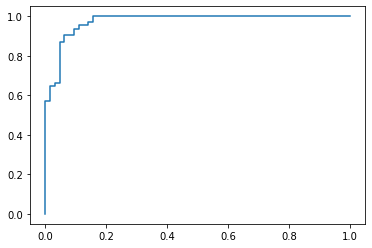

In [61]:
plt.plot(fpr, tpr)